In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("dataset_diabetes.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
# Drop rows where age is less than 18
df = df[df['age'] >= 18].reset_index(drop=True)

In [4]:
# Randomly assign 80, 81, 82, 83 to rows where age > 79
df.loc[df['age'] > 79, 'age'] = np.random.choice([78, 79, 80, 81, 82], size=(df['age'] > 79).sum(), p=[1/8, 1/8, 1/4, 1/4, 1/4])

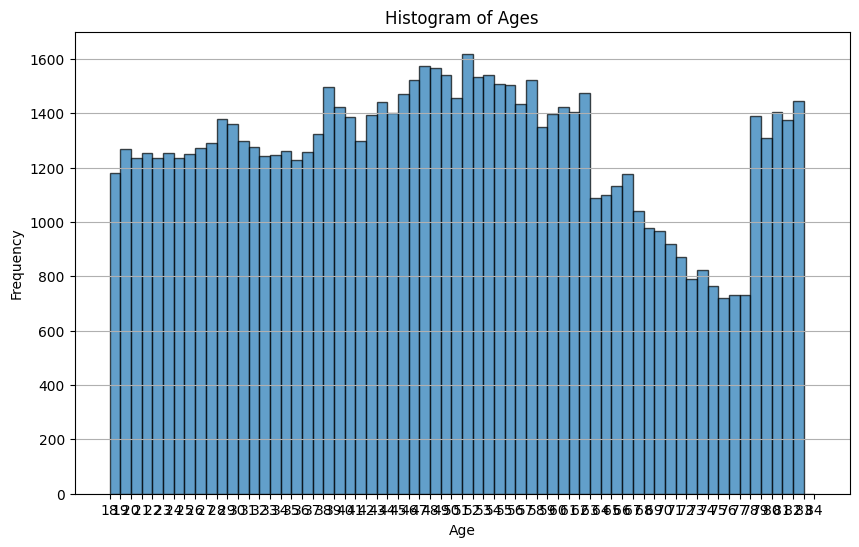

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot histogram of ages
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=range(18, 85), edgecolor='black', alpha=0.7)  # Adjust the range and bins as needed
plt.title('Histogram of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(18, 85))  # Set x-ticks to show ages
plt.grid(axis='y')

plt.show()

In [6]:
# Define bins and labels
bins = [0, 99, 125, float('inf')]
labels = ['Normal', 'Above Normal', 'Well Above Normal']

# Categorize blood_glucose_level data
df['blood_glucose_level'] = pd.cut(df['blood_glucose_level'], bins=bins, labels=labels, right=False)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,81.0,0,1,never,25.19,6.6,Well Above Normal,0
1,Female,54.0,0,0,No Info,27.32,6.6,Normal,0
2,Male,28.0,0,0,never,27.32,5.7,Well Above Normal,0
3,Female,36.0,0,0,current,23.45,5.0,Well Above Normal,0
4,Male,76.0,1,1,current,20.14,4.8,Well Above Normal,0
...,...,...,...,...,...,...,...,...,...
82776,Female,36.0,0,0,No Info,24.60,4.8,Well Above Normal,0
82777,Female,81.0,0,0,No Info,27.32,6.2,Normal,0
82778,Male,66.0,0,0,former,27.83,5.7,Well Above Normal,0
82779,Female,24.0,0,0,never,35.42,4.0,Above Normal,0


In [7]:
# Binary Encoding
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['smoking_history'] = df['smoking_history'].map({'current': 2, 'ever': 1, 'former': 1, 'never': 0, 'No Info': 0, 'not current': 0})
df['blood_glucose_level'] = df['blood_glucose_level'].map({'Normal': 0, 'Above Normal': 1, 'Well Above Normal':2})

# Display the updated DataFrame
print(df)

       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0         0.0  81.0             0              1                0  25.19   
1         0.0  54.0             0              0                0  27.32   
2         1.0  28.0             0              0                0  27.32   
3         0.0  36.0             0              0                2  23.45   
4         1.0  76.0             1              1                2  20.14   
...       ...   ...           ...            ...              ...    ...   
82776     0.0  36.0             0              0                0  24.60   
82777     0.0  81.0             0              0                0  27.32   
82778     1.0  66.0             0              0                1  27.83   
82779     0.0  24.0             0              0                0  35.42   
82780     0.0  57.0             0              0                2  22.43   

       HbA1c_level blood_glucose_level  diabetes  
0              6.6                  

In [8]:
# Rename specific columns
df = df.rename(columns={
    'gender': 'Gender',
    'age': 'Age',
    'hypertension': 'Hypertension',
    'heart_disease': 'Heart_disease',
    'smoking_history': 'Smoking_Status',
    'bmi': 'BMI',
    'HbA1c_level': 'HbA1c_level',
    'blood_glucose_level': 'Glucose',
    'diabetes': 'Diabetes'
})
df

,Gender,Age,Hypertension,Heart_disease,Smoking_Status,BMI,HbA1c_level,Glucose,Diabetes
0,0.0,81.0,0,1,0,25.19,6.6,2,0
1,0.0,54.0,0,0,0,27.32,6.6,0,0
2,1.0,28.0,0,0,0,27.32,5.7,2,0
3,0.0,36.0,0,0,2,23.45,5.0,2,0
4,1.0,76.0,1,1,2,20.14,4.8,2,0
...,...,...,...,...,...,...,...,...,...
82776,0.0,36.0,0,0,0,24.60,4.8,2,0
82777,0.0,81.0,0,0,0,27.32,6.2,0,0
82778,1.0,66.0,0,0,1,27.83,5.7,2,0
82779,0.0,24.0,0,0,0,35.42,4.0,1,0


In [9]:
# Drop rows where age is less than 18
df = df[df['BMI'] <= 45].reset_index(drop=True)

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

Gender            14
Age                0
Hypertension       0
Heart_disease      0
Smoking_Status     0
BMI                0
HbA1c_level        0
Glucose            0
Diabetes           0
dtype: int64


In [11]:
# Drop rows with NaN values
df = df.dropna()

In [12]:
df['Age'] = df['Age'].astype('int64')
df['Glucose'] = df['Glucose'].astype('int64')
df['Gender'] = df['Gender'].astype('int64')

In [13]:
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].unique())
    print("\n")

Column: Gender
[0 1]


Column: Age
[81 54 28 36 76 20 44 79 42 32 53 78 67 37 40 69 72 30 45 43 50 41 26 73
 77 66 29 60 38 57 74 19 46 21 59 27 56 34 82 55 80 62 47 68 75 22 58 18
 24 25 33 61 31 49 39 65 70 48 51 71 64 63 52 35 23]


Column: Hypertension
[0 1]


Column: Heart_disease
[1 0]


Column: Smoking_Status
[0 2 1]


Column: BMI
[25.19 27.32 23.45 ... 41.37 14.79 44.39]


Column: HbA1c_level
[6.6 5.7 5.  4.8 6.5 6.1 5.8 3.5 6.  4.  6.2 9.  7.  8.2 4.5 7.5 6.8 8.8]


Column: Glucose
[2 0 1]


Column: Diabetes
[0 1]




In [14]:
df.dtypes

Gender              int64
Age                 int64
Hypertension        int64
Heart_disease       int64
Smoking_Status      int64
BMI               float64
HbA1c_level       float64
Glucose             int64
Diabetes            int64
dtype: object

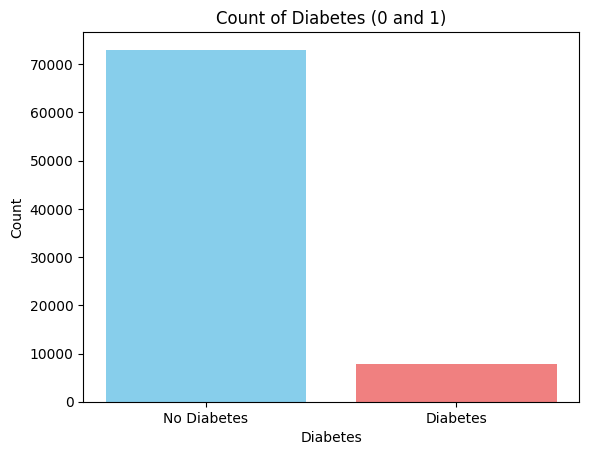

In [15]:
# Count the occurrences of each value in the 'diabetes' column
diabetes_counts = df['Diabetes'].value_counts()

# Create a bar plot
plt.bar(diabetes_counts.index, diabetes_counts.values, color=['skyblue', 'lightcoral'])
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Count of Diabetes (0 and 1)')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

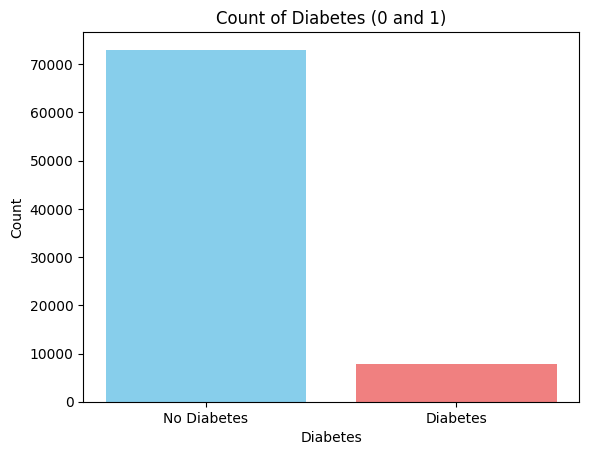

In [16]:
# Count the occurrences of each value in the 'diabetes' column
diabetes_counts = df['Diabetes'].value_counts()

# Create a bar plot
plt.bar(diabetes_counts.index, diabetes_counts.values, color=['skyblue', 'lightcoral'])
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Count of Diabetes (0 and 1)')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

Diabetes          0     1
Hypertension             
0             67783  5953
1              5225  1925


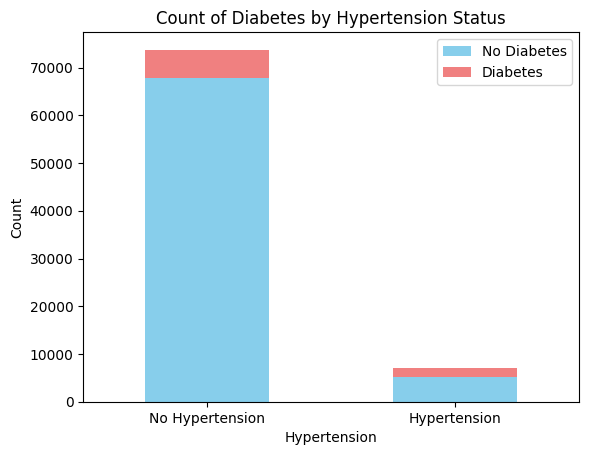

In [17]:
# Count occurrences of Diabetes within each Hypertension group
hypertension_diabetes_counts = df.groupby(['Hypertension', 'Diabetes']).size().unstack()

# Display the counts
print(hypertension_diabetes_counts)

# Plot the results
hypertension_diabetes_counts.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title('Count of Diabetes by Hypertension Status')
plt.xticks([0, 1], ['No Hypertension', 'Hypertension'], rotation=0)
plt.legend(['No Diabetes', 'Diabetes'])
plt.show()

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('Diabetes', axis=1)  # Replace 'target_column' with your actual target column name
y = df['Diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create an XGBoost Classifier with class weights
xgb_classifier = XGBClassifier(scale_pos_weight=2, random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14242   360]
 [  625   951]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14602
           1       0.73      0.60      0.66      1576

    accuracy                           0.94     16178
   macro avg       0.84      0.79      0.81     16178
weighted avg       0.94      0.94      0.94     16178



In [19]:
import joblib
# Save the model to a file
joblib.dump(xgb_classifier, 'model_diabetes1.joblib')

print("Model saved to 'model_diabetes.joblib'")

Model saved to 'model_diabetes.joblib'
